# Lab Assignment One: Exploring Text Data 


LJ Browlm, Joe McGuire, Henry Warren, Mike Lefebvre, Xingming Qu


## 1. Business Understanding

We are planning to categorize the subject of a given set of news articles which the BBC provides publicly as one of 5 classes: athletics, cricket, football, rugby, tennis. There exists several third-party use-cases for this data:
Ensuring correct categorization of user-submitted content on forum-based websites (auto-moderation of text submissions).
Aggregating and organizing articles for a direct consumer (news notifications, sports articles, etc).
As a determining factor in relevance of a webpage to an information need (search engine results, relevance-ranking, etc).

Our prediction model would need to perform at a level of 95%+ accuracy in order for widespread adoption to really be possible, as we believe the general public would not be willing to put up with a high degree of error in a task which can be so ideologically sensitive, and which might seem trivial to a non-technical observer.

The data itself consists of a corpus of news articles from the BBC. The format of the articles is not unlike that of the New York Times dataset used in lecture. For each article, we will be reading in the text body and indexing the vocabulary for further analysis. The dataset can be downloaded in a pre-processed format, but for the sake of the exercise we chose to download all the articles in raw text format, as we will be doing text-based processing. The only two features which are usable without any other preprocessing of the dataset are the bodies of the articles and their respective labels. 

When reading in the articles, we found that almost all words in it were in fact proper English words, so it was unnecessary to use a dictionary to filter words out based on language. In order to get the best predictive value from the words we had, we also agreed to stem all of the words, and remove the ‘stop’ words (like ‘a, I, are,’ etc), which are so frequently used in the English language that they would not be useful in our bag of words model. 



## 2. Data Encoding

Dataset: BBCSport

All rights, including copyright, in the content of the original articles are owned by the BBC.

Consists of 737 documents from the BBC Sport website corresponding to sports news articles in five topical areas from 2004-2005.
Class Labels: 5 (athletics, cricket, football, rugby, tennis)

Reference: http://mlg.ucd.ie/datasets/bbc.html

### 2.1 Read document data
Read in document data as strings using python. Read the data as raw text documents

In [13]:
# read txt file
def readtxt(filename):    
    with open(filename, 'r',encoding='gb18030', errors='ignore') as file_to_read:
        content = file_to_read.read()
    return content

In [66]:
#read all the documents 
import numpy as np
import pandas as pd
import os,shutil
import warnings
warnings.filterwarnings('ignore')

########################################Change your folder first#############################
folder='/home/debian/Documents/Machine-Learning-/bbcsport' 
folders=os.listdir(folder)
print('Document catagories are ',folders) 

summary_text=[]
for item in folders:  # find each catagory's dir
    each_catagory=[]
    print('now reading',item,'docs...')
    path=os.path.join(folder,item)
    docs=os.listdir(path)
    for doc in docs:  #find each doc in a folder
        doc_dir= os.path.join(path, doc)
        each_catagory.append(readtxt(doc_dir))
    summary_text.append(each_catagory)
print('==============================')    
it=0
for c in summary_text:
    print('There are',len(c),folders[it],'documents')
    it+=1
    
##summary_text contains the whole corpus, first index is catagories and second index is the number of document

Document catagories are  ['athletics', 'tennis', 'football', 'rugby', 'cricket']
now reading athletics docs...
now reading tennis docs...
now reading football docs...
now reading rugby docs...
now reading cricket docs...
There are 101 athletics documents
There are 100 tennis documents
There are 265 football documents
There are 147 rugby documents
There are 124 cricket documents


### 2.2 Verify data quality: 
The following functions are designed to remove words from the vocabulary that are not relevant, or to find ones that should not be included. 

Stop words need to be removed, because stop words like 'the','a','an' are so common in language and usually have no specific meaning.
We also need to remove redundant words that have different capitalization. Eg. APPLE, apple

In [15]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

# remove stop words from a document. Return a list of words that contain no stop words.
def removeStopWords(text):
    cleanwordlist = [word for word in text.lower().split() if word not in stoplist]
    return cleanwordlist


In [16]:
it=0
cleanWordLlist=[]
for c in summary_text: # traverse each catagories
    print('Now cleaning',folders[it],'documents.','Total number',len(c))
    it+=1
    each_catagory_clean=[]
    for doc in c: #traverse each document
        cleaned_words=removeStopWords(doc) #we get a list of words
        cleaned_string=""   # we need to concatenate all these words
        for word in cleaned_words:
            cleaned_string=cleaned_string+word+' '
        
        each_catagory_clean.append(cleaned_string)
        
    cleanWordLlist.append(each_catagory_clean)  
print('Finished')

Now cleaning athletics documents. Total number 101
Now cleaning tennis documents. Total number 100
Now cleaning football documents. Total number 265
Now cleaning rugby documents. Total number 147
Now cleaning cricket documents. Total number 124
Finished


In [17]:
# Compare cleaned doc and non-cleaned doc
# This is meant to highlight the value of removing stopwords
print(cleanWordLlist[0][0]) 
print('\r\n----------------------------------------------------------------------------------------\r\n')
print(summary_text[0][0])     

disappointed scott solid start allan scott confident winning medal next week's european indoor championships solid debut international circuit. 22-year-old scot finished fourth 60m hurdles jose cagigal memorial meeting madrid. "it definitely learning curve certainly ruled challenging medal next week," said east kilbride athlete. race felipe vivancos, equalled spanish record. sweden's robert kronberg second, haiti's dudley dorival third. scott slightly disappointed run final. heat 7.64secs ran 0.04secs slower first iaaf indoor grand prix circuit final. "i done better that," said. "i felt could it. got poor start - still felt ran faster." vivancos slashed personal best equal spanish record time 7.60secs kronberg dorival clocked 7.62secs 7.63secs respectively. 

----------------------------------------------------------------------------------------

Disappointed Scott in solid start

Allan Scott is confident of winning a medal at next week's European Indoor Championships after a solid de

### 2.3 Convert the data from raw text into a sparse encoded bag-of-words representation. 

Parameters used to convert to bag-of-words:

max_df : 
    In order to maximize the predictive validity of our data set it makes sense to remove words which are common to our corpus specifically. Using the max_df parameter allows us to ignore words which are likely to have low predictive impact.
   We set this parameter to 0.8 (determined through trial and error). 

min_df : 
    When building the vocabulary, ignore terms that have a document
    frequency lower than the given threshold. We set this parameter to 0.03, which makes each word at least appear 4 times, thereby reducing the number of rare words in the data set.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8,min_df=0.03) 

it=0
all_bag_words=[]
all_df=[]
for each_catgory in cleanWordLlist: # Encode bag-of-words, and create a pandas API out of this at the same time
    print('Now encoding bag-of-words:',folders[it])
    bag_words = count_vect.fit_transform(each_catgory)
    all_bag_words.append(bag_words)
    
    df = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names()) #store as df
    all_df.append(df)
    print('There are',df.shape[0],'document in',folders[it], 'and',df.shape[1],'unique words', df.shape,' \n') # print the shape of each category's df
    it+=1


Now encoding bag-of-words: athletics
There are 101 document in athletics and 932 unique words (101, 932)  

Now encoding bag-of-words: tennis
There are 100 document in tennis and 1088 unique words (100, 1088)  

Now encoding bag-of-words: football
There are 265 document in football and 1122 unique words (265, 1122)  

Now encoding bag-of-words: rugby
There are 147 document in rugby and 1218 unique words (147, 1218)  

Now encoding bag-of-words: cricket
There are 124 document in cricket and 1395 unique words (124, 1395)  



In [19]:
# Let's print athletics bag_words as example
print(all_bag_words[0].shape) # this is a sparse matrix
print('=========')
print(bag_words[0])

(101, 932)
  (0, 431)	1
  (0, 1106)	1
  (0, 865)	1
  (0, 227)	1
  (0, 114)	1
  (0, 1107)	1
  (0, 672)	1
  (0, 156)	1
  (0, 1386)	1
  (0, 1389)	1
  (0, 463)	1
  (0, 626)	1
  (0, 786)	1
  (0, 539)	1
  (0, 535)	1
  (0, 657)	1
  (0, 1368)	2
  (0, 94)	1
  (0, 294)	1
  (0, 799)	1
  (0, 772)	1
  (0, 349)	1
  (0, 264)	2
  (0, 1036)	1
  (0, 698)	1
  :	:
  (0, 1129)	2
  (0, 492)	3
  (0, 628)	1
  (0, 636)	5
  (0, 185)	3
  (0, 9)	1
  (0, 674)	4
  (0, 351)	2
  (0, 1149)	2
  (0, 472)	1
  (0, 533)	4
  (0, 1358)	2
  (0, 478)	1
  (0, 973)	2
  (0, 66)	2
  (0, 903)	3
  (0, 298)	1
  (0, 1252)	2
  (0, 356)	1
  (0, 1207)	2
  (0, 1232)	4
  (0, 1246)	3
  (0, 326)	1
  (0, 1211)	1
  (0, 170)	4


In [20]:
# Continuing to use athletics as an example, first print its df
all_df[0]

,000m,10,100m,11,12,13,15,1500m,16,17,...,worlds,would,wrong,year,years,yelena,yelling,yet,york,you
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,3,1,0,1,0,0,0,0,0
2,1,0,1,2,0,0,0,1,1,1,...,0,0,0,8,2,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,2,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,6,1,5,0,0,0,0,1,0
5,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
7,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,0
8,0,0,4,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,1,0,...,0,0,0,2,1,0,0,0,0,0


In [23]:
# Print out 10 most common words in our athletics data, in descending order
all_df[0].sum().sort_values()[-10:][::-1]

world       160
year        159
olympic     137
race        112
champion     99
athens       99
indoor       96
european     94
time         83
also         81
dtype: int64

In [24]:
# Print out 10 least common words in our athletics data
all_df[0].sum().sort_values()[:10]

kathy         4
playing       4
aware         4
maintained    4
main          4
pleased       4
delivered     4
deciding      4
avoid         4
barrier       4
dtype: int64

### 2.4 Convert the data into a sparse encoded tf-idf representation

We used the same parameters as the previous section, but with different values: max_df (0.85), min_df (0.02)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df=0.85,min_df=0.02)

it=0
all_tfidf_mat=[]
all_tfidf_df=[]
for each_catgory in cleanWordLlist: # Encode tf-idf representation, and create a pandas API at the same time
    print('Now encoding tf-idf representation:',folders[it])
    tfidf_mat = tfidf_vect.fit_transform(each_catgory)
    all_tfidf_mat.append(tfidf_mat)
    
    df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names()) #store as df
    all_tfidf_df.append(df)
    print('There are',df.shape[0],'document in',folders[it], ' And',df.shape[1],'unique words', df.shape,' \n') # print the shape of each category's df
    it+=1


Now encoding tf-idf representation: athletics
There are 101 document in athletics  And 1240 unique words (101, 1240)  

Now encoding tf-idf representation: tennis
There are 100 document in tennis  And 1644 unique words (100, 1644)  

Now encoding tf-idf representation: football
There are 265 document in football  And 1470 unique words (265, 1470)  

Now encoding tf-idf representation: rugby
There are 147 document in rugby  And 1866 unique words (147, 1866)  

Now encoding tf-idf representation: cricket
There are 124 document in cricket  And 1809 unique words (124, 1809)  



In [26]:
# Continuing to use athletics as example, first print its df
all_tfidf_df[0]

,000,000m,04,07,10,100m,11,12,13,14,...,written,wrong,year,years,yelena,yelling,yet,york,you,young
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.040654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.071597,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.054154,0.000000,0.030070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.025073,0.043434,0.000000,0.000000,0.024655,0.082294,0.000000,0.00000,0.0,...,0.000000,0.000000,0.103967,0.043621,0.000000,0.000000,0.000000,0.000000,0.037699,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.056002,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.059037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.048144,0.000000,0.000000,0.049856,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.075420,0.124768,0.000000,0.000000,0.000000,0.000000,0.063494,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.051137,0.000000,0.000000,0.00000,0.0,...,0.090085,0.000000,0.000000,0.045236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.000000,0.098000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.069137,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.036442,0.061159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.228817,0.000000,0.000000,0.00000,0.0,...,0.000000,0.000000,0.060305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.078397,0.000000,0.000000,0.000000,0.000000,0.07427,0.0,...,0.000000,0.000000,0.046915,0.039368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
# print out 10 most common words in our athletics data, in descending order
all_tfidf_df[0].sum().sort_values()[-10:][::-1]

world       5.056765
race        4.420013
year        4.207379
olympic     3.961530
indoor      3.889828
holmes      3.816896
european    3.673291
kenteris    3.532539
athens      3.458411
champion    3.440136
dtype: float64

In [15]:
# print out 10 least common words in our athletics data
all_tfidf_df[0].sum().sort_values()[:10]

seeking         0.133793
olympian        0.143506
decathlete      0.146022
breaking        0.151755
disqualified    0.155029
damaged         0.155084
shock           0.155946
whose           0.156570
contact         0.156844
rivalry         0.157382
dtype: float64

## 3 Data Visualization

#### 3.1.1 Visualize the word frequencies and most relevant words of the whole dataset

In [32]:
## collect all the words from the dataset (after removed stop words)
corpus=[]
for each_catagory in cleanWordLlist:
    for each_doc in each_catagory:
        corpus.append(each_doc)
len(corpus)

737

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(max_df=0.5,min_df=0.005) # an object capable of counting words in a document!

# Encode bag-of-words, and create a pandas API at the same time
corpus_bag_words = count_vect.fit_transform(corpus)
corpus_df = pd.DataFrame(data=corpus_bag_words.toarray(),columns=count_vect.get_feature_names()) #store as df
print('The corpus has',corpus_bag_words.shape[1],'unique words') # this is a sparse matrix


The corpus has 4727 unique words


We manually adjusted max_df=0.5, min_df=0.005 to remove words and make each word appear at least 4 times.


In [34]:
# Print out 10 most common words in our data, in descending order
corpus_df.sum().sort_values()[-10:][::-1]

england    749
game       681
year       647
two        605
we         589
would      581
it         574
time       561
win        551
last       549
dtype: int64

In [35]:
# Print out 10 least common words in our data
corpus_df.sum().sort_values()[:10]

fuming      4
features    4
favours     4
favoured    4
farewell    4
familiar    4
falls       4
fairness    4
awful       4
fading      4
dtype: int64

Let's compare with the previous condition that we made bag-of-words by each category:

There are 101 document in athletics  And 932 unique words (101, 932)  
There are 124 document in cricket  And 1395 unique words (124, 1395)  
There are 265 document in football  And 1122 unique words (265, 1122)  
There are 147 document in rugby  And 1218 unique words (147, 1218)  
There are 100 document in tennis  And 1088 unique words (100, 1088)  

So for these sports news, there are about 5000 words that often appear and make sense.

Then let's see the tf-idf

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_df=0.75,min_df=0.005) 

# Encodee tf-idf representation, and create a pandas API at the same time
corpus_tfidf_mat = tfidf_vect.fit_transform(corpus)
corpus_tfidf_df = pd.DataFrame(data=corpus_tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names()) #store as df
print('The corpus has',corpus_tfidf_mat.shape[1],'unique words') # this is a sparse matrix

The corpus has 4729 unique words


In [37]:
# print out 10 most common words in our data, in descending order
corpus_tfidf_df.sum().sort_values()[-10:][::-1]

england    21.890783
first      17.491276
we         17.423121
game       16.891177
year       16.578932
it         15.587404
world      15.441429
would      15.358223
win        14.933463
one        14.687249
dtype: float64

In [22]:
# print out 10 least common words in our data
corpus_tfidf_df.sum().sort_values()[:10]

拢100m            0.155625
ideally          0.164691
prompted         0.168004
scamper          0.168593
brutal           0.171588
cheaply          0.172368
smash            0.172662
causes           0.174276
possibilities    0.174310
ante             0.176010
dtype: float64

In [38]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

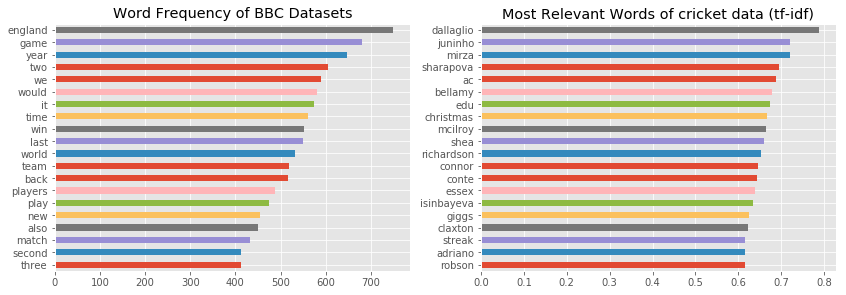

In [40]:
Top20words=corpus_df.sum().sort_values()[-20:]
Top20relvantwords = corpus_tfidf_df.max().sort_values()[-20:]

plt.style.use('ggplot')

fig = plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
Top20words.plot(kind='barh')
plt.title('Word Frequency of BBC Datasets')

plt.subplot(2,2,2)
Top20relvantwords.plot(kind='barh')

plt.title('Most Relevant Words of cricket data (tf-idf)')

plt.show()

These charts illustrate how tf-idf allows us to select for words with greater predictive impact, when compared to word frequency.

#### 3.1.2 Visualize document lengths and vocabulary size,

In [46]:
###### Visualize document lengths 

# get the lengths of all the documents
all_doc_length=[]
for each_catagory in cleanWordLlist:
    for each_doc in each_catagory:
        all_doc_length.append(len(each_doc))
length_df=pd.DataFrame()
length_df['Len']=all_doc_length
print('The number of total documents is',len(length_df))

The number of total documents is 737


/root/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


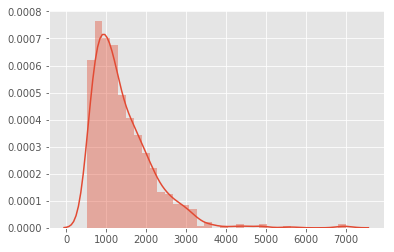

In [43]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.distplot(length_df)

This shows the distribution of documents by word length.

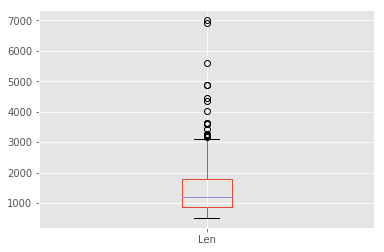

In [47]:
ax = length_df.boxplot(column='Len')

After seeing the previous graph was not a multi-modal distribution, we decided to make a boxplot.

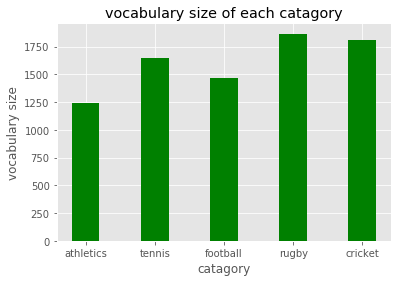

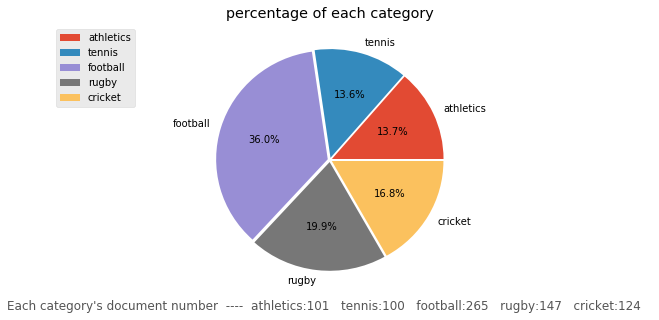

In [48]:
########## Visualize vocabulary size and the percentage of each category

# Next let's see vocabulary size of each catagory
vo_size=[each_catagory.shape[1] for each_catagory in all_tfidf_df]
fig = plt.figure()
label=folders

plt.bar(label,vo_size,0.4,color="green")
plt.xlabel("catagory")
plt.ylabel("vocabulary size")
plt.title("vocabulary size of each catagory")


#Let us see what percentage of each category
# Draw a pie chart

values=[len(c) for c in summary_text]
plt.figure(figsize=(5,5))
explode=[0.02 for x in summary_text]# Distance to center radius

plt.pie(values,explode=explode,labels=label,autopct='%1.1f%%')# draw chart
plt.title('percentage of each category')#Title
plt.legend(loc='upper left', bbox_to_anchor=(-0.5, 1))
Xstring="Each category's document number  ----  "
it=0
for c in summary_text:
    Xstring=Xstring+folders[it]+':'+str(len(c))+'   '
    it+=1    
plt.xlabel(Xstring)
plt.show()


The bar chart above shows the distribution of unique words by category.

The pie chart illustrates the distribution of documents by category, relative to the entire data set. 

### 3.2 Visualize most relevant word frequencies

Word clouds can be powerful visualizations for this task. 

In [50]:
# Let's make word clouds 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

## concatenate all the document to a long string
doc_string_arr=[]
for each_catagory in cleanWordLlist:
    each_catagory_string=""
    for each_doc in each_catagory:
        each_catagory_string=each_catagory_string+each_doc+' '
    doc_string_arr.append(each_catagory_string)

In [51]:
# input is a long string and generate wordcloud
new_stopwords={'it','to', 'of','said','he','we','also','one','two','three','the','six','i\'m'}
def generate_wordcloud(text): # optionally add: stopwords=STOPWORDS and change the arg below
    wordcloud = WordCloud(background_color ='white',
                          width = 1400, height = 700,
                          relative_scaling = 1.0,
                          max_words=50,
                          stopwords =new_stopwords  # set or space-separated string
                          ).generate(text)
    plt.figure(figsize = (11, 11), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

This is the word cloud for athletics


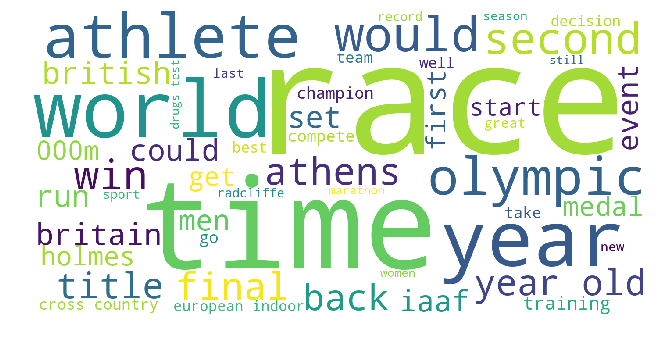

This is the word cloud for tennis


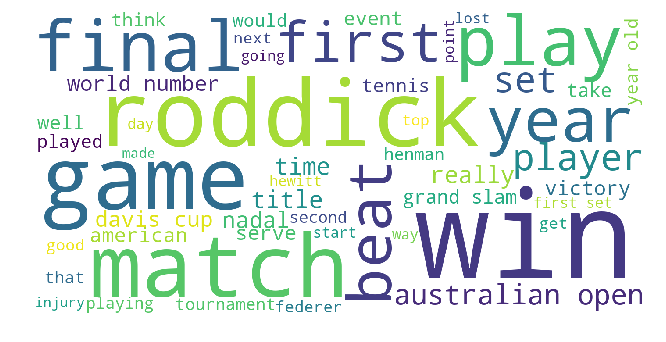

This is the word cloud for football


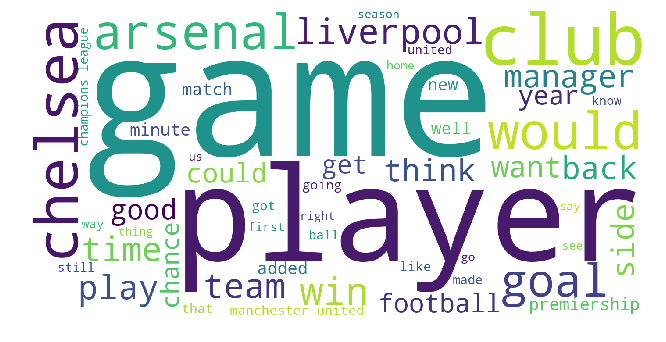

This is the word cloud for rugby


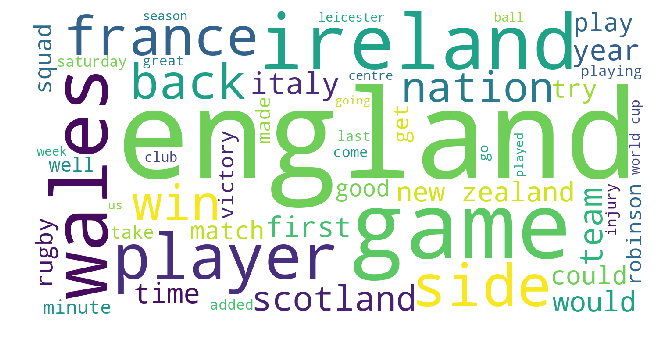

This is the word cloud for cricket


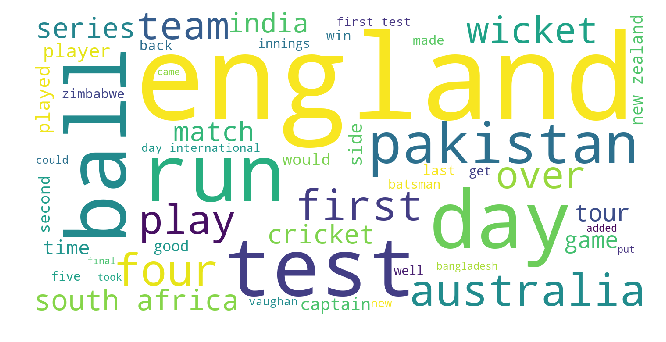

In [52]:
#### ['athletics', 'cricket', 'football', 'rugby', 'tennis']
for i in range(5):
    print('This is the word cloud for', folders[i] )
    generate_wordcloud(doc_string_arr[i])

**Are there any prevalent differences between your target classes?** 


Yes, there are prevalent differences in our target classes as evidenced by the differences in used vocabulary and word sizes in the word clouds for each respective target class.

**Is there separation in the visualizations that could be used to help classify the classes?**


Yes, there is separation that could classify the classes by nature of the words used in each wordcloud e.g., "Rugby" appears in the rugby category, along with associated rugby terms; "wicket" appears in cricket category; "roddick" for tennis.


Use Dimension Reduction to produce a better visualization of the 5 catagories, using T-SNE.

In [58]:
## make label list
label_length=[len(c) for c in summary_text]
label_list=[]
category=0
for i in label_length:
    for j in range(i):
        label_list.append(category)
    category+=1
print(len(label_list))
y=np.array(label_list)

737


In [59]:
# perform T-SNE
from sklearn import manifold, datasets
tsne = manifold.TSNE(n_components=2)
X = corpus_df
y=np.array(label_list)
# target_names = folders
%time X_tsne = tsne.fit_transform(X)
print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))


CPU times: user 20.3 s, sys: 724 ms, total: 21 s
Wall time: 19.7 s
Org data dimension is 4727. Embedded data dimension is 2


/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/root/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


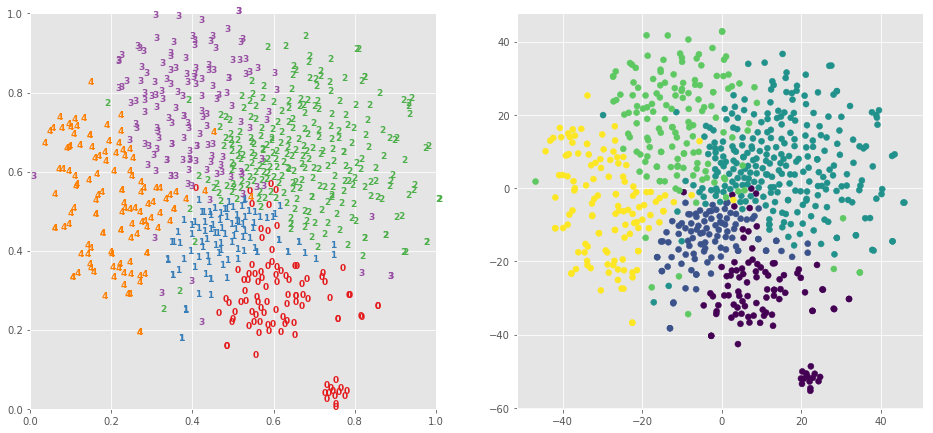

In [60]:
from matplotlib.pyplot import scatter
x_min, x_max = X_tsne.min(0), X_tsne.max(0)
from sklearn import preprocessing
X_norm=preprocessing.scale(X_tsne)
X_norm = (X_tsne - x_min) / (x_max - x_min)  
plt.figure(figsize=(16, 16))

plt.subplot(2,2,1)
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=plt.cm.Set1(y[i]), 
             fontdict={'weight': 'bold', 'size': 9})

plt.subplot(2,2,2)
ax = scatter(X_tsne[:,0], X_tsne[:,1], c=y )
plt.show()

0: 'athletics', 1: 'cricket', 2: 'football', 3: 'rugby', 4:'tennis'

#### After Dimension Reduction, we can see from the above image that news with same category tend to group together.
There for we can perform machine learning algorithms like SVM, KNN to predict the exsit news and new news

### 4.0 Bigram analysis

Bigram distribution 

In [61]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
##There are more stemming algorithms, but Porter (PorterStemer) is the most popular.
ps = PorterStemmer()

In [62]:
def stemEachDoc(doc):
    
    words = word_tokenize(doc)
    after_stemming_string=''
    for w in words:
        after_stemming_string=after_stemming_string+ps.stem(w)+' '
    return after_stemming_string

##test
print(stemEachDoc(cleanWordLlist[0][0]))

### Let's see what words have been stemmed
sentence =cleanWordLlist[0][0]
words = word_tokenize(sentence)
for word in words:
    if word!=ps.stem(word):
        print(word + "--->" + ps.stem(word))

disappoint scott solid start allan scott confid win medal next week 's european indoor championship solid debut intern circuit . 22-year-old scot finish fourth 60m hurdl jose cagig memori meet madrid . `` it definit learn curv certainli rule challeng medal next week , '' said east kilbrid athlet . race felip vivanco , equal spanish record . sweden 's robert kronberg second , haiti 's dudley doriv third . scott slightli disappoint run final . heat 7.64sec ran 0.04sec slower first iaaf indoor grand prix circuit final . `` i done better that , '' said . `` i felt could it . got poor start - still felt ran faster . '' vivanco slash person best equal spanish record time 7.60sec kronberg doriv clock 7.62sec 7.63sec respect . 
disappointed--->disappoint
confident--->confid
winning--->win
championships--->championship
international--->intern
finished--->finish
hurdles--->hurdl
cagigal--->cagig
memorial--->memori
meeting--->meet
definitely--->definit
learning--->learn
curve--->curv
certainly---

##### Use Lemmatizer to achieve better grouping than stemming.

In [63]:
le = WordNetLemmatizer()
def LemmatizEachDoc(doc):
    
    words = word_tokenize(doc)
    after_stemming_string=''
    for w in words:
        after_stemming_string=after_stemming_string+le.lemmatize(w)+' '
    return after_stemming_string

print(LemmatizEachDoc(cleanWordLlist[0][0]))

### Let's see what words have been lemmatized
sentence =cleanWordLlist[0][0]
words = word_tokenize(sentence)
for word in words:
    if word!=le.lemmatize(word):
        print(word + "--->" + le.lemmatize(word))

disappointed scott solid start allan scott confident winning medal next week 's european indoor championship solid debut international circuit . 22-year-old scot finished fourth 60m hurdle jose cagigal memorial meeting madrid . `` it definitely learning curve certainly ruled challenging medal next week , '' said east kilbride athlete . race felipe vivancos , equalled spanish record . sweden 's robert kronberg second , haiti 's dudley dorival third . scott slightly disappointed run final . heat 7.64secs ran 0.04secs slower first iaaf indoor grand prix circuit final . `` i done better that , '' said . `` i felt could it . got poor start - still felt ran faster . '' vivancos slashed personal best equal spanish record time 7.60secs kronberg dorival clocked 7.62secs 7.63secs respectively . 
championships--->championship
hurdles--->hurdle


Although some words(like hunting, owns) have not been lemmatize, we don't want to mistakely stem words.

In [38]:
## Now let's lemmatize the whole corpus
lemmatized_corpus=[]
for each_catagory in cleanWordLlist:
    for each_doc in each_catagory:
        lemmatized_corpus.append(LemmatizEachDoc(each_doc))

In [39]:
print(lemmatized_corpus[0])

claxton hunting first major medal british hurdler sarah claxton confident win first major medal next month 's european indoor championship madrid . 25-year-old already smashed british record 60m hurdle twice season , setting new mark 7.96 second win aaa title . `` i quite confident , '' said claxton . `` but take race come . `` a long keep training much think chance medal . '' claxton national 60m hurdle title past three year struggled translate domestic success international stage . now , scotland-born athlete owns equal fifth-fastest time world year . last week 's birmingham grand prix , claxton left european medal favourite russian irina shevchenko trailing sixth spot . first time , claxton preparing campaign hurdle - could explain leap form . previous season , 25-year-old also contested long jump since moving colchester london re-focused attention . claxton see new training regime pay dividend european indoors take place 5-6 march . 


## Vizulazation of bigrams
### Using graphs and co-occurence matrices

## Build a co-occurence matrix

### Word-Embedding
bellow we test some diffrent techniques to map unique words found in a corpus to vectors in a vector space. The idea/hope is that some relationships between words found in the corpus will be preserved through this mapping and will manifest as characteristics of the word vectors. [More Information On Vector Representations Of Words](https://www.tensorflow.org/tutorials/word2vec)

1. Build a co-occurrence matrix from a corpus which represents how frequently word pairs occur together.

1. Search for word vectors with the soft constraint that given a word vector pair, their inner product will yield a value close to the two values in the co-occurrence matrix associated with those two words.

Methods implimented for decomposing the cooccurence matrix into word vectors:

* Stochastic Gradient Descent, which draws heavily on the implementations by "Word2vec" and "GloVe"

* Methods using Eigen Decomposition and Singular Value Decomposition.

In [67]:
# build a cooccurence matrix, first join the entire corpus into one single string
the_whole_string=''.join(corpus)
the_whole_string[:100]

"disappointed scott solid start allan scott confident winning medal next week's european indoor champ"

In [68]:
#
# Build Co-occurence Matrix, A
#

import itertools

# external
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize, word_tokenize

def process_text(text):
	""" return list of lowercase alphabetic words from text """
	tokenizer = RegexpTokenizer(r'\w+')
	return tokenizer.tokenize(text.lower())

def ngram_tupples(corpus, n):
	""" Create ngram tupples by sentence. Where n is the distance between words in a sentence. """
	sentences = sent_tokenize(corpus)

	pairs = []
	for s in sentences:
		unique_tokens = process_text(s)
		pairs.extend(ngrams(unique_tokens,n))

	return pairs

def get_unique_words(corpus):
	return list(set(process_text(corpus)))

def w2id_id2w_maps(unique_words):
	""" return both dictonaries for mapping between words and ids """
	id2w = {i:w for i,w in enumerate(unique_words)}
	w2id = {w:i for i,w in id2w.items()}
	return w2id, id2w

def ngram_inc_amt(n):
	""" return float for increment weight of pair occurence n distance appart. \nWeight increment ~ 1/n """
	return 1/float(n**2)

def words2ids(words, w2id):
	""" return list of ids inplace of list of words using w2id dictionary """
	return [w2id[w] for w in words]

def cooccurence_pair_of_distance(sentence_list, d):
    """ return list of unique coocurence pairs of distace d """

    all_ngrams = ngrams(sentence_list,d)

    all_pairs = []
    for t in all_ngrams:
        if len(t) > 1:
            all_pairs.extend(list(itertools.combinations(t, 2)))

    return list(set(all_pairs))

def break_corpus(corpus):
    """ Build Cooccurence Matrix. Return A, n, w2id, id2w """

    unique_words = get_unique_words(corpus)
    n = len(unique_words)
    w2id, id2w = w2id_id2w_maps(unique_words)

    #create empty cooccurence matrix
    #A = np.zeros([n,n],np.float32)
    A = np.ones([n,n],np.float32)

    #compute cooccurence matrix
    sentences = sent_tokenize(corpus)
    for s in sentences:
        s = process_text(s)
        max_distance = len(s) + 1
        s = [w2id[w] for w in s]	#convert words to ids

        for d in range(2,max_distance):
            pairs = cooccurence_pair_of_distance(s, d)

            #update cooccurence matrix for each pair
            for p in pairs:
                A[p[0],p[1]] += ngram_inc_amt(d)
                A[p[1],p[0]] += ngram_inc_amt(d)

    return A, n, w2id, id2w

%time A, n, w2id, id2w = break_corpus(the_whole_string)


CPU times: user 5min 59s, sys: 532 ms, total: 6min
Wall time: 6min 1s


In [48]:

"""
	Normalize and clean text methods
"""
import logging
import string
import math

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk import FreqDist
from nltk.tag import pos_tag

# logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def is_stopword(word):
	""" Return True of word is in stop word list """
	stop_words = nltk.corpus.stopwords.words('english')
	return word in stop_words

def is_punctuation(word):
	return len(word) == 1 and word in string.punctuation

def is_number(word):
	try:
		float(word)
		return True
	except ValueError:
		logger.debug('ValueError is_number')
 
	try:
		import unicodedata
		unicodedata.numeric(word)
		return True
	except (TypeError, ValueError):
		logger.debug('ValueError is_number')
	 
	return False

def is_shorter(word,n=3):
	if len(word) < n:
		return True
	return False

def stem(word):
	ps = PorterStemmer()
	return ps.stem(word)

def clean_word(raw_word):
	""" Takes string converts to lower case, stems 
	and returns empty string if word is stop word, 
	punctation or is less than 3 characters long """

	raw_word = raw_word.lower()
	if is_stopword(raw_word) or is_punctuation(raw_word) or is_shorter(raw_word) or is_number(raw_word):
		word = ""
	else:
		word = stem(raw_word)
	return word

def remove_short_and_stopwords(token_list):
	filtered_token_list = []
	for t in token_list:
		if is_stopword(t) or is_punctuation(t) or is_shorter(t) or is_number(t):pass
		else: filtered_token_list.append(t)
	return filtered_token_list



## Finding related terms 
Now that we have built a co-occurence matrix we can use it to find related terms.

In [64]:
def rank_most_related_words(A, w2id, id2w, w1):
    col = A[:,w2id[w1]].tolist()

    list_of_index_value_tuples = list(zip(list(range(len(col))),col))
    #(colindex,value)
    sorted_indexs_value_tuples = sorted(list_of_index_value_tuples, key=lambda x: x[1])
    sorted_indexs_value_tuples.reverse()
    indexs, values = zip(*sorted_indexs_value_tuples)
    ranked_words = [id2w[i] for i in indexs]
    return ranked_words

# rank_most_related_words(A,w2id, id2w, 'aa')

def related_words_list_filtered_decending(A, w2id, id2w, w1):
    raw_related_words = rank_most_related_words(A, w2id, id2w, w1)
    filtered_related_words = remove_short_and_stopwords(raw_related_words)
    return filtered_related_words

k = 5
query = 'win'
top_k_most_related_terms = related_words_list_filtered_decending(A,w2id, id2w, query)[:k]

print("Top %s most related terms to \'%s\':" % (k, query))
print(top_k_most_related_terms)

Top 5 most related terms to 'win':
['first', 'cup', 'game', 'england', 'final']


## Word Embedding Methods
Decompose Co-occurence Matrix, A, into matrix of word vectors, W, so that
A = WW.t

More about this at this [link](https://github.com/browlm13/Word-Embedding/blob/master/word_embedding_mock_1_v4.pdf)

In [50]:
#internal
import random

#external
import numpy as np

"""
Matrix Decomposition
	Method 1) Singular Value Decomposition of Forced Square Symmetric Positive Definite Matrix
	Method 2) Eigen Decomposition of Forced Square Symmetric Positive Matrix
	Method 3) Stocastic Gradient Decent Decomposition
"""

# check symmetry of matrix up to some tolerance
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

#force square symetric matrix to symetric positive definite matrix
def to_positive_definite(S):
    """ Take absolute value of S and update diagnol entries to make a diagonally dominant matrix with diagonal entries greater than 0. """
    # take absolute value of S
    S = np.absolute(S)

    # Sum rows in S
    new_diagonals = S.sum(axis=1)

    #replace diagnols in S
    np.fill_diagonal(S, new_diagonals)

    return S

"""
####################################################################################
# Singular Value Decomposition of Forced Square Symmetric Positive Definite Matrix #
####################################################################################
1.) Force Cooccurence Matrix A to Positive Definite Matrix
    " A diagonally dominant(by rows) symetric matrix with diagonal elements all greater than zero is positive definite."
    Take symmetric matrix and make diagonally dominant with diagnonal entries greater than 0
2.) Square Symmetric Positive Definite Matrix Decomposition
    " If A is positive definite, then A = QLQt = UDV (where U=V=Q and L=D) can be written as A = WWt where W = Qsqrt(L) "
    -SVD: A=UDV, W = Vsqrt(diagnol(D))
    Find V and D from singular value decomposition of A
    return W = Vsqrt(D)
overview of code:
    #
    # force symmetric matrix to positive definite matrix
    #
    # take absolute value of A
    A = np.absolute(A)
    # Sum rows in a
    new_diagonals = A.sum(axis=1)
    #replace diagnols in A
    np.fill_diagonal(A, new_diagonals)
    #
    # decompose positive definite matrix
    #
    # singular value decomposition
    U, D, V = np.linalg.svd(A, full_matrices=False)
    #
    # compute W from V and D of singular value decomposition
    #
    # Create matrix W = Vtsqrt(diagnol(D)) #why Vt?
    W = np.dot(np.transpose(V), np.sqrt(np.diag(D)))
    #A = WWt
"""

def svd_spd_decomposition(P):
    """ return M such that P = MMt, where matrix parameter P is SPD """
    # Assert Matrix P is symetric
    assert check_symmetric(P)

    # singular value decomposition
    U, D, V = np.linalg.svd(P, full_matrices=False)

    # Create matrix W = Vtsqrt(diagnol(D)) #why Vt?
    M = np.dot(np.transpose(V), np.sqrt(np.diag(D)))

    return M

def spd_decomposition(S):
	""" Force Cooccurence Matrix A to Positive Definite Matrix and decompose into W such that A = WWt. """
	P = to_positive_definite(S)
	M = svd_spd_decomposition(P)
	return M

#
# Perform Symmetric Positive Definite Decomposition
#

W = spd_decomposition(A)

print("\n\n\nSymmetric Positive Definite Decomposition:\n")
print("\n\nA:")
print (A)
print("\n\nA2 (modified into SPD):\n")
print(to_positive_definite(A))
print("\nWWt:\n")
print(np.dot(W, np.transpose(W)))

## Graphing Bigrams

In [51]:
import plotly.plotly as py
from plotly.graph_objs import *
import networkx as nx
import matplotlib.pyplot as plt

def get_related_terms_graph_edges(selected_terms, connections_per_term, A, w2id, id2w):
    # list of lists where the first index is a corpus term and the trailing indexs are its ranked related words
    list_of_related_word_lists = []
    for t in selected_terms:
        print('\nterm: %s' % t)
        related_terms = related_words_list_filtered_decending(A, w2id, id2w, t)
        print(related_terms[:connections_per_term])

        list_of_related_word_lists.append(related_terms[:connections_per_term])

    np_related_words = np.array(list_of_related_word_lists)

    related_words_network = [[term,related_terms] for term,related_terms in zip(selected_terms, np_related_words.tolist())]

    edges_related_words_network = []
    for term,related_terms in related_words_network:
        edges_cur_related_word = [(term, r) for r in related_terms]
        edges_related_words_network += edges_cur_related_word

    return edges_related_words_network

In [74]:
def draw_graph(terms, terms_graph_edges, sample_size=None, bounciness_coeff=0.3, zoom=50, size=(8,8), text_size=15):
    
    if sample_size==None:
        sample_size=len(terms)

    G=nx.Graph()#  G is an empty Graph

    random_terms_sample = list(random.sample(terms, sample_size))
    Nodes= random_terms_sample
    G.add_nodes_from(Nodes)
    Edges= [e for e in terms_graph_edges if e[0] in random_terms_sample]
    G.add_edges_from(Edges)

    pos = nx.spring_layout(G,k=bounciness_coeff, iterations=zoom)

    from matplotlib.pyplot import figure
    figure(num=None, figsize=size, dpi=100, facecolor='w', edgecolor='k')
    nx.draw(G, node_color='w',edge_color='c',font_size=text_size,with_labels=True, pos=pos)
    plt.show()
    print(list(random.sample(terms, sample_size)))

In [75]:
m = 3 # number of connections per term
graph_1_corpus_terms =['football','tennis','rugby','athletics','cricket']

%time graph_1_edges = get_related_terms_graph_edges(graph_1_corpus_terms, m, A, w2id, id2w)


term: football
['association', 'league', 'world']

term: tennis
['cup', 'association', 'play']

term: rugby
['union', 'international', 'world']

term: athletics
['greek', 'federation', 'body']

term: cricket
['international', 'board', 'test']
CPU times: user 7.41 s, sys: 1.07 s, total: 8.47 s
Wall time: 8.5 s


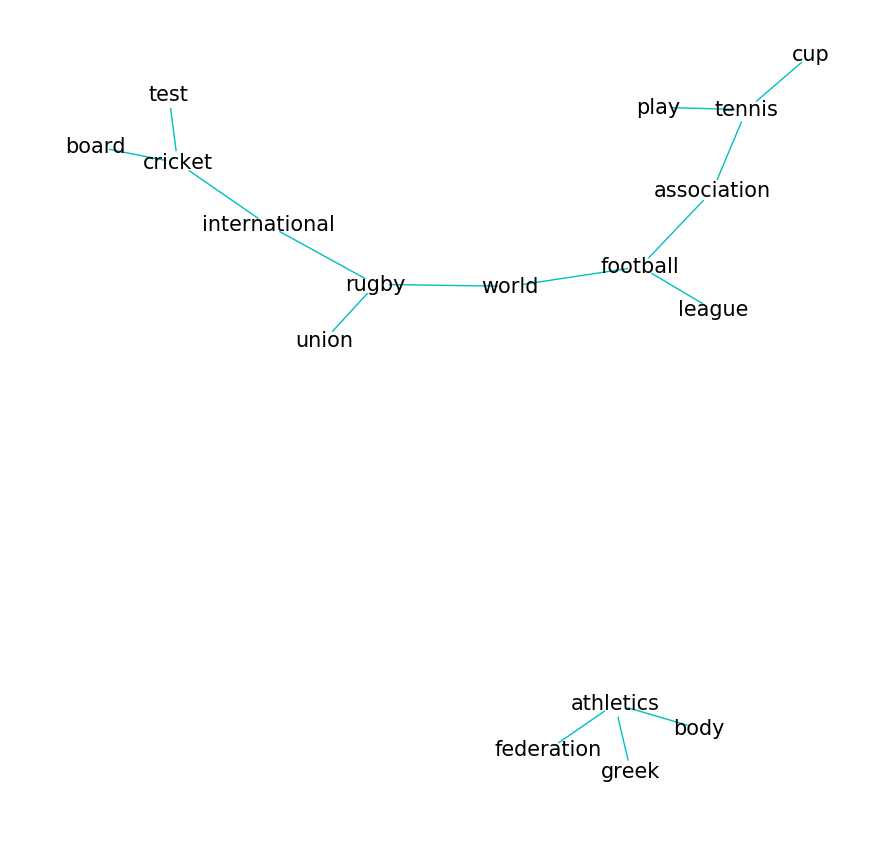

['rugby', 'tennis', 'athletics', 'football', 'cricket']


In [76]:
draw_graph(graph_1_corpus_terms, graph_1_edges)

In [77]:
import random

n = 30 # sample size
m = 3 # number of connections per term
random_indexs = random.sample(range(0, len(id2w)-1), n)
graph_2_corpus_terms = [id2w[i] for i in random_indexs]


%time graph_2_edges = get_related_terms_graph_edges(graph_2_corpus_terms, m, A, w2id, id2w)


term: promoted
['number', 'symonds', 'also']

term: do
['want', 'thing', 'work']

term: understandably
['james', 'anderson', 'rusty']

term: 42
['england', 'count', 'facing']

term: commission
['violence', 'anti', 'appeal']

term: nottinghamshire
['seasons', 'star', 'four']

term: 51secs
['time', 'leading', 'season']

term: inside
['goal', 'first', 'edge']

term: efforts
['half', 'victims', 'brent']

term: volume
['little', 'darrel', 'increases']

term: abn
['field', 'amro', 'world']

term: still
['win', 'time', 'believe']

term: ze
['roberto', 'frings', 'scholl']

term: surrounded
['nistelrooy', 'angry', 'arsenal']

term: mortis
['rigor', 'slowness', 'field']

term: string
['second', 'side', 'positive']

term: inherit
['problems', 'smith', 'vogts']

term: wrongs
['right', 'determined', 'thoroughly']

term: cricketing
['nature', 'purely', 'authorities']

term: mcintosh
['wood', 'white', 'lloyd']

term: restrict
['amount', 'often', 'cricket']

term: ham
['west', 'chelsea', 'cardiff']



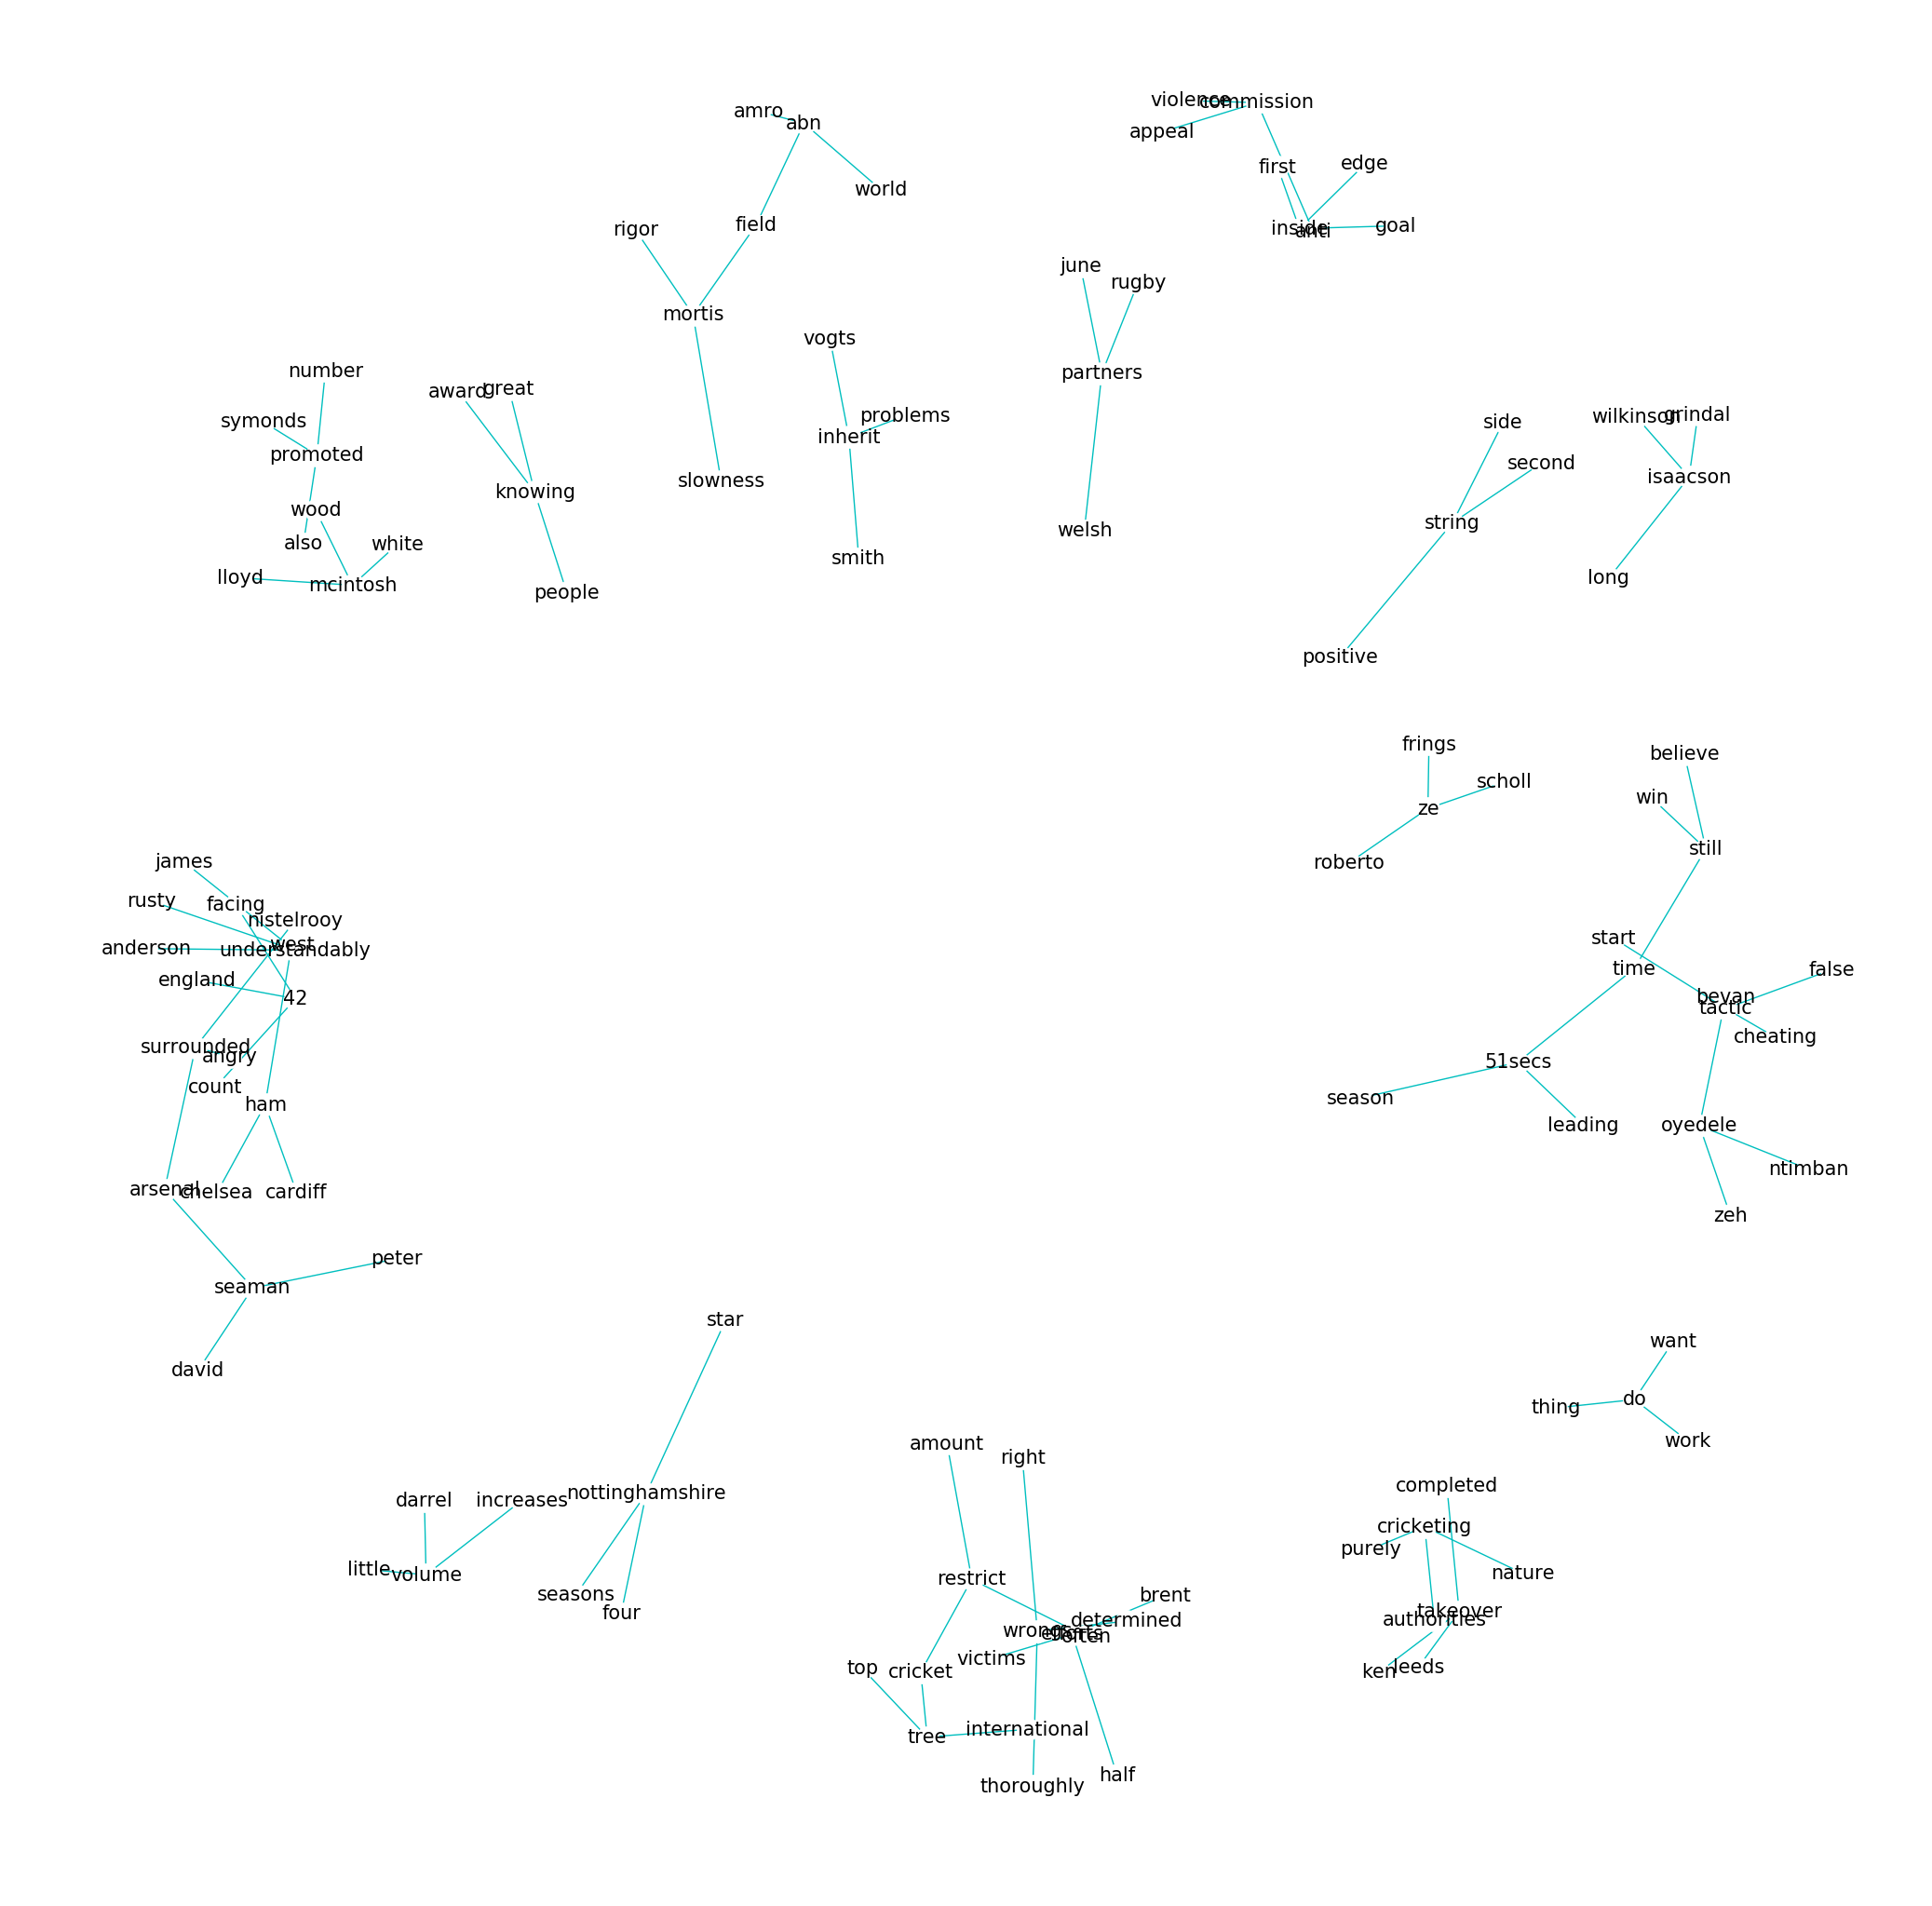

['promoted', '51secs', 'partners', 'nottinghamshire', 'mcintosh', 'still', 'isaacson', 'tactic', 'restrict', 'inside', 'commission', 'do', 'cricketing', 'wrongs', 'surrounded', 'ham', 'takeover', 'abn', 'knowing', 'oyedele', 'ze', 'understandably', 'volume', 'seaman', 'inherit', '42', 'tree', 'string', 'mortis', 'efforts']


In [78]:
draw_graph(graph_2_corpus_terms, graph_2_edges, bounciness_coeff=0.5, zoom=150, size=(20,20))

## 4.1 Sentiment analysis 

Sentiment analysis can highlight the overall positive or negative sentiment of a corpus of data. By analyzing sentiment by category, we can assess which sport may illicit emotion in the author, which in turn, may be influential on the reader.

In [42]:
#Reference: https://medium.com/@sharonwoo/sentiment-analysis-with-nltk-422e0f794b8
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt

positives=[]
neutrals=[]
negatives=[]

def doSentiments(tokens):    #this function from the reference above
    sid = SentimentIntensityAnalyzer()
    summary = {"positive":0,"neutral":0,"negative":0}
    total = 0
    
    for x in tokens: 
        ss = sid.polarity_scores(x)
        if ss["compound"] == 0.0: 
            summary["neutral"] +=1
        elif ss["compound"] > 0.0:
            summary["positive"] +=1
        else:
            summary["negative"] +=1
        
        total += 1
    
    summary["positive_pct"] = summary["positive"]/total*100
    summary["neutral_pct"] = summary["neutral"]/total*100
    summary["negative_pct"] = summary["negative"]/total*100
    
    positives.append(summary["positive_pct"])
    neutrals.append(summary["neutral_pct"])
    negatives.append(summary["negative_pct"])
        
    print(summary)

categories = ['Athletics', 'Tennis', 'Football', 'Rugby', 'Cricket']
k = 0 
for words in cleanWordLlist:
    message = ''.join(words)
    tokens = nltk.wordpunct_tokenize(message)
    
    print(categories[k], end=" ")
    k += 1
    doSentiments(tokens)
    


C:\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Athletics {'positive': 1410, 'neutral': 21653, 'negative': 802, 'positive_pct': 5.90823381521056, 'neutral_pct': 90.73119631259166, 'negative_pct': 3.3605698721977793}
Tennis {'positive': 1738, 'neutral': 35168, 'negative': 1043, 'positive_pct': 4.579830825581702, 'neutral_pct': 92.67174365595932, 'negative_pct': 2.7484255184589848}
Football {'positive': 4605, 'neutral': 61206, 'negative': 2204, 'positive_pct': 6.770565316474307, 'neutral_pct': 89.9889730206572, 'negative_pct': 3.2404616628684852}
Rugby {'positive': 2431, 'neutral': 39403, 'negative': 1472, 'positive_pct': 5.613540848843116, 'neutral_pct': 90.98739204729137, 'negative_pct': 3.399067103865515}
Cricket {'positive': 1675, 'neutral': 20557, 'negative': 820, 'positive_pct': 7.266180808606629, 'neutral_pct': 89.17664410897103, 'negative_pct': 3.5571750824223494}


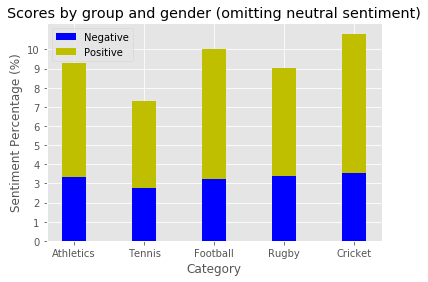

In [43]:
#reference: https://matplotlib.org/examples/pylab_examples/bar_stacked.html

import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, negatives, width, color='b')
p2 = plt.bar(ind, positives, width,
             bottom=negatives, color='y')

plt.title('Scores by group and gender (omitting neutral sentiment)')
plt.xlabel('Category')
plt.xticks(ind, categories)
plt.ylabel('Sentiment Percentage (%)')
plt.yticks(np.arange(0,11,step=1))
plt.legend((p1[0], p2[0]), ('Negative', 'Positive'))

plt.show()